# 컨볼루션 신경망
※ 해당 과제는 CNN을 활용한 이진분류 예제입니다.    


먼저 실행 권장(코랩): https://teddylee777.github.io/colab/google-colab-%EB%9F%B0%ED%83%80%EC%9E%84-%EC%97%B0%EA%B2%B0%EB%81%8A%EA%B9%80%EB%B0%A9%EC%A7%80    

> function ClickConnect(){   
    console.log("코랩 연결 끊김 방지");    
    document.querySelector("colab-toolbar-button#connect").click()    
}   
setInterval(ClickConnect, 60 * 1000)   


__런타임 GPU 확인__

# 데이터 다운로드

In [1]:
!pip install gdown
!gdown --id 1Oct5tvQbWhL8hknVMrI5Vc957xbU_Nua --output /content/Mask_data.zip

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1Oct5tvQbWhL8hknVMrI5Vc957xbU_Nua
To: /content/Mask_data.zip
100% 78.8M/78.8M [00:01<00:00, 44.9MB/s]


# Q1. 이미지 데이터 경로 설정

In [2]:
import os
import zipfile
local_zip = '/content/Mask_data.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')

In [3]:
zip_ref.extractall('/content')
zip_ref.close()

In [4]:
base_dir = '/content/'
train_dir = os.path.join(base_dir, 'train') # 경로생성
validation_dir = os.path.join(base_dir, 'validation')
print(train_dir)
print(validation_dir)

/content/train
/content/validation


In [5]:
train_maskY_dir = os.path.join(train_dir, 'withmask')
train_maskN_dir = os.path.join(train_dir, 'withoutmask')
print(train_maskY_dir)
print(train_maskY_dir)

/content/train/withmask
/content/train/withmask


In [6]:
val_maskY_dir = os.path.join(validation_dir, 'withmask')
val_maskN_dir = os.path.join(validation_dir, 'withoutmask')
print(val_maskY_dir)
print(val_maskY_dir)

/content/validation/withmask
/content/validation/withmask


In [7]:
train_maskY_fnames = os.listdir(train_maskY_dir)
train_maskN_fnames = os.listdir(train_maskN_dir)

In [8]:
print(train_maskY_fnames[:5])
print(train_maskN_fnames[:5])

['withmask (490).jpg', 'withmask (355).jpg', 'withmask (351).jpg', 'withmask (459).jpg', 'withmask (203).jpg']
['withoutmask (81).jpg', 'withoutmask (105).jpg', 'withoutmask (554).jpg', 'withoutmask (379).jpg', 'withoutmask (455).jpg']


In [9]:
print('학습용 마스크 사진 : ', len(train_maskY_fnames))
print('학습용 노마스크 사진 : ', len(train_maskN_fnames))

학습용 마스크 사진 :  620
학습용 노마스크 사진 :  620


In [10]:
val_maskY_fnames = os.listdir(val_maskY_dir)
val_maskN_fnames = os.listdir(val_maskN_dir)
print(val_maskY_fnames[:5])
print(val_maskN_fnames[:5])

['withmask (675).jpg', 'withmask (698).jpg', 'withmask (731).jpg', 'withmask (756).jpg', 'withmask (682).jpg']
['withoutmask (684).jpg', 'withoutmask (819).jpg', 'withoutmask (734).jpg', 'withoutmask (672).jpg', 'withoutmask (729).jpg']


In [11]:
print('검증용 마스크 사진 : ', len(val_maskY_fnames))
print('검증용 노마스크 사진 : ', len(val_maskN_fnames))

검증용 마스크 사진 :  200
검증용 노마스크 사진 :  200


# Q2. 데이터 시각화 

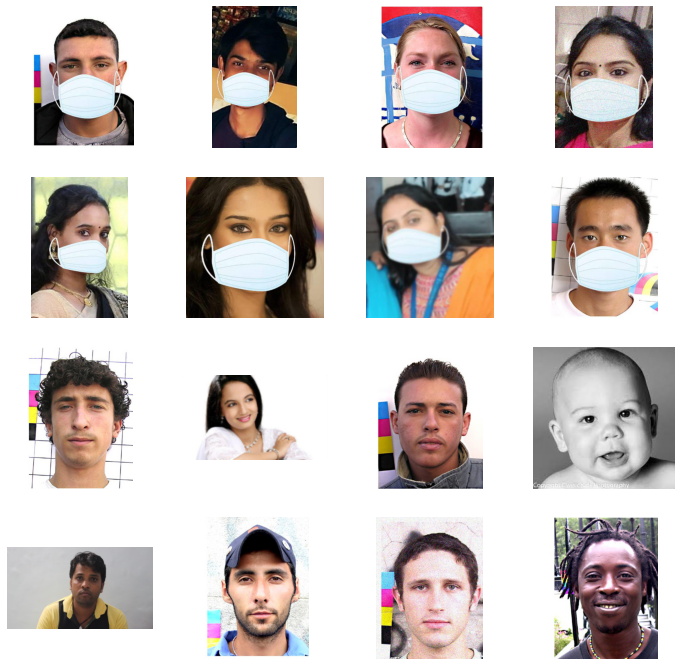

In [16]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

nrows, ncols = 4,4
pic_index = 0

fig = plt.gcf()
fig.set_size_inches(ncols*3, nrows*3)

pic_index+=8
next_cat_pix = [os.path.join(train_maskY_dir, fname) for fname in \
                train_maskY_fnames[ pic_index-8:pic_index]]
next_dog_pix = [os.path.join(train_maskN_dir, fname) for fname in \
                train_maskN_fnames[ pic_index-8:pic_index]]

for i, img_path in enumerate(next_cat_pix+next_dog_pix):
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off')

  img = mpimg.imread(img_path)
  plt.imshow(img)
plt.show()

# Q3. 데이터 스케일링 및 전처리
- ImageDataGenerator를 사용하여 스케일링   
- 학습데이터 검증데이터 라밸링


In [17]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#---------------------------- 이미지 어그멘테이션
train_datagen = ImageDataGenerator(rescale = 1./255,
                                  horizontal_flip = True,
                                   vertical_flip = True,
                                   brightness_range = [0.5, 1.5],
                                   zoom_range = 0.2,
                                   width_shift_range = 0.1,
                                   height_shift_range = 0.1,
                                   rotation_range = 30,
                                   fill_mode = 'nearest')
# fill_mode에는 'constant', 'nearest', 'reflect', 'wrap'
val_datagen = ImageDataGenerator(rescale = 1./255)

In [18]:
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size = 32,
                                                    target_size=(150,150),
                                                    color_mode = 'rgb',
                                                    class_mode = 'binary')
val_generator = val_datagen.flow_from_directory(validation_dir,
                                                    batch_size = 32,
                                                    target_size=(150,150),
                                                    color_mode = 'rgb',
                                                    class_mode = 'binary')

Found 1240 images belonging to 2 classes.
Found 400 images belonging to 2 classes.


# Q4. 모델 구성
- 모델은 자유롭게 구성
- 책과는 다르게
- epochs는 50번

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2,l1,l1_l2

model = Sequential()
model.add(Conv2D(filters = 32, kernel_size = 3, padding = 'same',
                 activation = 'relu', input_shape = (150, 150, 3)))
model.add(MaxPool2D(pool_size = (2,2), strides = 2, padding = 'same'))

model.add(Conv2D(filters = 32, kernel_size = 3, padding = 'same',
                 activation = 'relu', kernel_regularizer = l2(0.001)))
model.add(MaxPool2D(pool_size = (2,2), strides = 2, padding = 'same'))

model.add(Conv2D(filters = 64, kernel_size = 3, padding = 'same',
                 activation = 'relu', kernel_regularizer = l2(0.001))) 
model.add(MaxPool2D(pool_size = (2,2), strides = 2, padding = 'same'))

model.add(Conv2D(filters = 128, kernel_size = 3, padding = 'same',
                 activation = 'relu', kernel_regularizer = l2(0.001)))
model.add(MaxPool2D(pool_size = (2,2), strides = 2, padding = 'same'))

model.add(Dropout(0.3)) # 드롭아웃 추가
model.add(Flatten())
model.add(Dense(256, activation = 'relu', kernel_regularizer = l2(0.001))) 
model.add(Dense(1, activation = 'sigmoid'))

model.compile(optimizer = Adam(1e-4),
              loss = 'binary_crossentropy',
              metrics = ['acc'])

# Q5. 모델 학습하기

In [20]:
def get_step(train_len, batch_size):
  if(train_len % batch_size > 0):
    return train_len // batch_size + 1
  else:
    return train_len // batch_size

history2 = model.fit(train_generator,
                    epochs = 10,
                    validation_data = val_generator)

Epoch 1/10
39/39 [==============================] - 61s 2s/step - loss: 1.2846 - acc: 0.5298 - val_loss: 1.2126 - val_acc: 0.5325
Epoch 2/10
39/39 [==============================] - 57s 1s/step - loss: 1.1493 - acc: 0.5750 - val_loss: 1.0512 - val_acc: 0.7875
Epoch 3/10
39/39 [==============================] - 58s 1s/step - loss: 1.0061 - acc: 0.6976 - val_loss: 0.8455 - val_acc: 0.7700
Epoch 4/10
39/39 [==============================] - 60s 2s/step - loss: 0.8753 - acc: 0.7460 - val_loss: 0.6662 - val_acc: 0.9050
Epoch 5/10
39/39 [==============================] - 58s 1s/step - loss: 0.7162 - acc: 0.8323 - val_loss: 0.4881 - val_acc: 0.9725
Epoch 6/10
39/39 [==============================] - 58s 1s/step - loss: 0.6248 - acc: 0.8726 - val_loss: 0.4864 - val_acc: 0.9175
Epoch 7/10
39/39 [==============================] - 60s 2s/step - loss: 0.5770 - acc: 0.8879 - val_loss: 0.4245 - val_acc: 0.9350
Epoch 8/10
39/39 [==============================] - 65s 2s/step - loss: 0.5317 - acc: 0.91

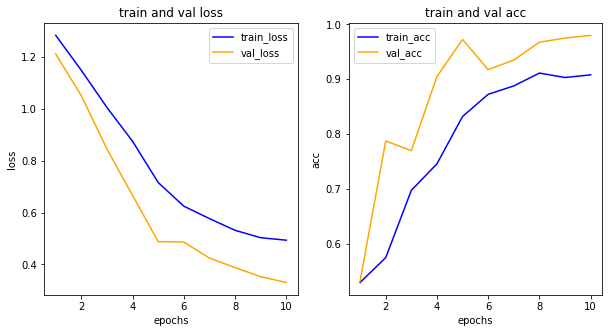

In [22]:
import matplotlib.pyplot as plt

his_dict = history2.history
loss = his_dict['loss']
val_loss = his_dict['val_loss']

epochs = range(1, len(loss)+1)
fig = plt.figure(figsize = (10,5))
# 학습 및 검증 손실 그리기

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, color = 'blue', label = 'train_loss')
ax1.plot(epochs, val_loss , color = 'orange', label = 'val_loss')
ax1.set_title('train and val loss')
ax1.set_xlabel('epochs')
ax1.set_ylabel('loss')
ax1.legend()

acc = his_dict['acc']
val_acc = his_dict['val_acc']

# 학습 및 검증 정확도 그리기

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, acc, color = 'blue', label = 'train_acc')
ax2.plot(epochs, val_acc, color = 'orange', label = 'val_acc')
ax2.set_title('train and val acc')
ax2.set_xlabel('epochs')
ax2.set_ylabel('acc')
ax2.legend()

In [47]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt

def pred(fname):
  img=image.load_img(fname, target_size=(150,150))
  plt.imshow(img)

  x=image.img_to_array(img)
  images = np.expand_dims(x, axis = 0)

  classes = model.predict(images, batch_size = 10)
  print(classes[0])

  if classes[0]>0:
    print(fname.split('/')[-1] + ' 마스크 미착용')
  else:
    print(fname.split('/')[-1] + ' 마스크 착용')


In [43]:
test_dir = os.path.join(base_dir, 'test')
test_fnames = os.listdir(test_dir)

[0.]
withmask_test_00.jpg 마스크 착용
[0.]
withmask_test_01.jpg 마스크 착용
[0.]
withmask_test_03.jpg 마스크 착용
[1.]
withoutmask_test_00.jpg 마스크 미착용
[1.]
withoutmask_test_01.jpg 마스크 미착용


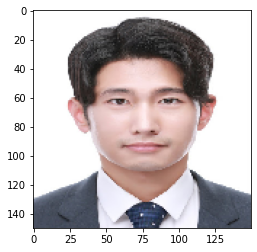

In [51]:
# 마스크 미착용자 테스트

pred('/content/test/withmask_test_00.jpg')
pred('/content/test/withmask_test_01.jpg')
pred('/content/test/withmask_test_03.jpg')
pred('/content/test/withoutmask_test_00.jpg')
pred('/content/test/withoutmask_test_01.jpg')


In [45]:
files.upload()

{}

[1.]
1.jpg 마스크 미착용
[1.]
2.jpg 마스크 미착용
[0.]
3.jpg 마스크 착용
[1.]
4.jpg 마스크 미착용
[1.]
5.jpg 마스크 미착용
[1.]
6.jpg 마스크 미착용
[0.]
7.jpg 마스크 착용
[1.]
8.jpg 마스크 미착용
[1.]
9.jpg 마스크 미착용
[0.]
10.jpg 마스크 착용
[0.]
11.jpg 마스크 착용
[0.]
12.jpg 마스크 착용
[0.]
13.jpg 마스크 착용
[1.]
14.jpg 마스크 미착용
[0.]
15.jpg 마스크 착용


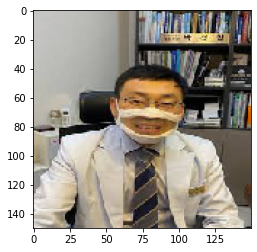

In [52]:
for i in range(1,16):
  pred('/content/'+str(i)+'.jpg')

In [ ]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

nrows, ncols = 4,4
pic_index = 0

fig = plt.gcf()
fig.set_size_inches(ncols*3, nrows*3)

pic_index+=8
next_pix = [os.path.join('/content/', fname) for fname in \
                train_maskY_fnames[ pic_index-8:pic_index]]

for i, img_path in enumerate(next_pix):
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off')

  img = mpimg.imread(img_path)
  plt.imshow(img)
plt.show()

# Q6. 학습과정 시각화

1번째 50개 돌린거

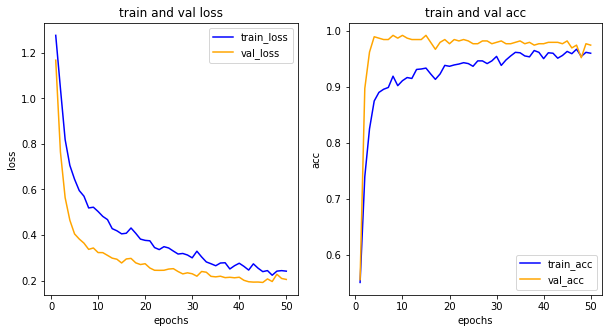

In [28]:
import matplotlib.pyplot as plt

his_dict = history.history
loss = his_dict['loss']
val_loss = his_dict['val_loss']

epochs = range(1, len(loss)+1)
fig = plt.figure(figsize = (10,5))
# 학습 및 검증 손실 그리기

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, color = 'blue', label = 'train_loss')
ax1.plot(epochs, val_loss , color = 'orange', label = 'val_loss')
ax1.set_title('train and val loss')
ax1.set_xlabel('epochs')
ax1.set_ylabel('loss')
ax1.legend()

acc = his_dict['acc']
val_acc = his_dict['val_acc']

# 학습 및 검증 정확도 그리기

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, acc, color = 'blue', label = 'train_acc')
ax2.plot(epochs, val_acc, color = 'orange', label = 'val_acc')
ax2.set_title('train and val acc')
ax2.set_xlabel('epochs')
ax2.set_ylabel('acc')
ax2.legend()

# Q7. 모델 테스트

In [50]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt

def pred(fname):
  img=image.load_img(fname, target_size=(150,150))
  plt.imshow(img)

  x=image.img_to_array(img)
  images = np.expand_dims(x, axis = 0)

  classes = model.predict(images, batch_size = 10)
  print(classes[0])

  if classes[0]>0:
    print(fname.split('/')[-1] + '마스크 미착용')
  else:
    print(fname.split('/')[-1] + '마스크 착용')


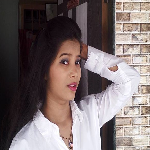

In [36]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt

img = image.load_img('/content/train/withoutmask/withoutmask (10).jpg',
                     target_size=(150,150))
img

In [37]:
x = image.img_to_array(img)
print('전', x.shape)
images = np.expand_dims(x,axis=0) # 샘플을 넣기위해 차원을 확장해줘야함
print('후',images.shape)

전 (150, 150, 3)
후 (1, 150, 150, 3)


In [38]:
classes = model.predict(images, batch_size=10)
classes

array([[1.]], dtype=float32)

# Q8. ImageDataGenerator를 활용한 이미지 증식

In [39]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#---------------------------- 이미지 어그멘테이션
train_datagen = ImageDataGenerator(rescale = 1./255,
                                  horizontal_flip = True,
                                  vertical_flip = True,
                                  brightness_range = [0.5, 1.0],
                                  zoom_range = 0.5,
                                  width_shift_range = 0.3,
                                  height_shift_range = 0.3,
                                  rotation_range = 20,
                                  fill_mode = 'nearest')
# fill_mode에는 'constant', 'nearest', 'reflect', 'wrap'
val_datagen = ImageDataGenerator(rescale = 1./255)

# Q9. 데이터 스케일링 및 전처리
- ImageDataGenerator를 사용하여 스케일링   
- 학습데이터 검증데이터 라벨링


In [ ]:
# from tensorflow.keras.preprocessing.image import ImageDataGenerator
# train_datagen = ImageDataGenerator(rescale=1./255)
# validation_datagen = ImageDataGenerator(rescale=1./255)

In [40]:
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size = 32,
                                                    target_size=(200,200),
                                                    color_mode = 'rgb',
                                                    class_mode = 'binary')
val_generator = val_datagen.flow_from_directory(validation_dir,
                                                    batch_size = 32,
                                                    target_size=(200,200),
                                                    color_mode = 'rgb',
                                                    class_mode = 'binary')

Found 1240 images belonging to 2 classes.
Found 400 images belonging to 2 classes.


# Q10. 모델 구성
- Q4와 동일하게

In [43]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.regularizers import l2,l1,l1_l2

model = Sequential()
model.add(Conv2D(filters = 16, kernel_size = 3, padding = 'same',
                 activation = 'relu', input_shape = (200, 200, 3)))
model.add(MaxPool2D(pool_size = (2,2), strides = 2, padding = 'same'))

model.add(Conv2D(filters = 32, kernel_size = 3, padding = 'same',
                 activation = 'relu', kernel_regularizer = l2(0.001)))
model.add(Conv2D(filters = 32, kernel_size = 3, padding = 'same',
                 activation = 'relu', kernel_regularizer = l2(0.001)))
model.add(MaxPool2D(pool_size = (2,2), strides = 2, padding = 'same'))

model.add(Conv2D(filters = 64, kernel_size = 3, padding = 'same',
                 activation = 'relu', kernel_regularizer = l2(0.001))) 
model.add(Conv2D(filters = 64, kernel_size = 3, padding = 'same',
                 activation = 'relu', kernel_regularizer = l2(0.001)))
model.add(MaxPool2D(pool_size = (2,2), strides = 2, padding = 'same'))

model.add(Conv2D(filters = 32, kernel_size = 3, padding = 'same',
                 activation = 'relu', kernel_regularizer = l2(0.001)))
model.add(MaxPool2D(pool_size = (2,2), strides = 2, padding = 'same'))

model.add(Dropout(0.3)) # 드롭아웃 추가
model.add(Flatten())
model.add(Dense(256, activation = 'relu', kernel_regularizer = l2(0.001))) 
model.add(Dense(1, activation = 'sigmoid'))

model.compile(optimizer = SGD(),
              loss = 'binary_crossentropy',
              metrics = ['acc'])

# Q11. 모델 학습하기

In [44]:
def get_step(train_len, batch_size):
  if(train_len % batch_size > 0):
    return train_len // batch_size + 1
  else:
    return train_len // batch_size

history = model.fit(train_generator,
                    epochs = 50,
                    validation_data = val_generator)

Epoch 1/50
39/39 [==============================] - 23s 543ms/step - loss: 1.3840 - acc: 0.4968 - val_loss: 1.3811 - val_acc: 0.5000
Epoch 2/50
39/39 [==============================] - 22s 565ms/step - loss: 1.3822 - acc: 0.4992 - val_loss: 1.3776 - val_acc: 0.5075
Epoch 3/50
39/39 [==============================] - 19s 500ms/step - loss: 1.3801 - acc: 0.5250 - val_loss: 1.3743 - val_acc: 0.5050
Epoch 4/50
39/39 [==============================] - 19s 495ms/step - loss: 1.3772 - acc: 0.5202 - val_loss: 1.3703 - val_acc: 0.5200
Epoch 5/50
39/39 [==============================] - 19s 493ms/step - loss: 1.3744 - acc: 0.5597 - val_loss: 1.3647 - val_acc: 0.5175
Epoch 6/50
39/39 [==============================] - 19s 489ms/step - loss: 1.3715 - acc: 0.5516 - val_loss: 1.3581 - val_acc: 0.5425
Epoch 7/50
39/39 [==============================] - 19s 489ms/step - loss: 1.3660 - acc: 0.5919 - val_loss: 1.3476 - val_acc: 0.5825
Epoch 8/50
39/39 [==============================] - 19s 493ms/step - 

# Q12. 학습과정 시각화

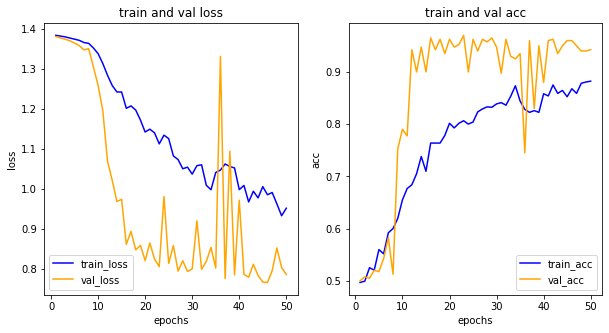

In [45]:
import matplotlib.pyplot as plt

his_dict = history.history
loss = his_dict['loss']
val_loss = his_dict['val_loss']

epochs = range(1, len(loss)+1)
fig = plt.figure(figsize = (10,5))
# 학습 및 검증 손실 그리기

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, color = 'blue', label = 'train_loss')
ax1.plot(epochs, val_loss , color = 'orange', label = 'val_loss')
ax1.set_title('train and val loss')
ax1.set_xlabel('epochs')
ax1.set_ylabel('loss')
ax1.legend()

acc = his_dict['acc']
val_acc = his_dict['val_acc']

# 학습 및 검증 정확도 그리기

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, acc, color = 'blue', label = 'train_acc')
ax2.plot(epochs, val_acc, color = 'orange', label = 'val_acc')
ax2.set_title('train and val acc')
ax2.set_xlabel('epochs')
ax2.set_ylabel('acc')
ax2.legend()

# Q13. 모델 테스트

In [55]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt

def pred200(fname):
  img=image.load_img(fname, target_size=(200,200))
  plt.imshow(img)

  x=image.img_to_array(img)
  images = np.expand_dims(x, axis = 0)

  classes = model.predict(images, batch_size = 10)
  print(classes[0])

  if classes[0]>0:
    print(fname.split('/')[-1] + '마스크 착용')
  else:
    print(fname.split('/')[-1] + '마스크 미착용')



In [ ]:
# 마스크 미착용자 테스트
import random

for i in range(10):
  x = random.randint(621,621+len(val_maskY_fnames))
  pred200('/content/validation/withoutmask/withoutmask ('+str(x)+').jpg')

[0.]
withmask (715).jpg마스크 착용
[0.]
withmask (673).jpg마스크 착용
[0.]
withmask (766).jpg마스크 착용
[0.]
withmask (779).jpg마스크 착용
[0.]
withmask (735).jpg마스크 착용
[0.]
withmask (668).jpg마스크 착용
[0.]
withmask (768).jpg마스크 착용
[0.]
withmask (657).jpg마스크 착용
[0.]
withmask (742).jpg마스크 착용
[0.]
withmask (787).jpg마스크 착용


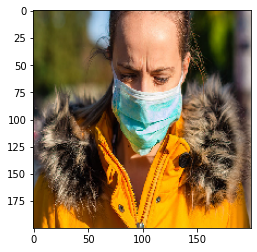

In [68]:
# 마스크 착용자 테스트
import random

for i in range(10):
  x = random.randint(621,621+len(val_maskY_fnames))
  pred200('/content/validation/withmask/withmask ('+str(x)+').jpg')

# Q14. 전이학습
- VGG16 제외하고 다른 모델 사용 할 것

In [81]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#---------------------------- 이미지 어그멘테이션
train_datagen = ImageDataGenerator(rescale = 1./255,
                                  horizontal_flip = True,
                                  vertical_flip = True,
                                  brightness_range = [0.5, 1.5],
                                  zoom_range = 0.2,
                                  width_shift_range = 0.2,
                                  height_shift_range = 0.2,
                                  rotation_range = 30,
                                  fill_mode = 'nearest')
# fill_mode에는 'constant', 'nearest', 'reflect', 'wrap'
val_datagen = ImageDataGenerator(rescale = 1./255)

In [90]:
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size = 32,
                                                    target_size=(224,224),
                                                    color_mode = 'rgb',
                                                    class_mode = 'binary')
val_generator = val_datagen.flow_from_directory(validation_dir,
                                                    batch_size = 32,
                                                    target_size=(224,224),
                                                    color_mode = 'rgb',
                                                    class_mode = 'binary')

Found 1240 images belonging to 2 classes.
Found 400 images belonging to 2 classes.


In [ ]:
# from tensorflow.keras.applications import NASNetLarge

# nasNL = NASNetLarge(weights = 'imagenet',
#                     input_shape  = (331, 331, 3),
#                     include_top = False)

In [86]:
# nasNL.summary()

Model: "NASNet"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 331, 331, 3  0           []                               
                                )]                                                                
                                                                                                  
 stem_conv1 (Conv2D)            (None, 165, 165, 96  2592        ['input_3[0][0]']                
                                )                                                                 
                                                                                                  
 stem_bn1 (BatchNormalization)  (None, 165, 165, 96  384         ['stem_conv1[0][0]']             
                                )                                                            

In [91]:
from tensorflow.keras.applications import NASNetMobile

nasNL = NASNetMobile(weights = 'imagenet',
                    input_shape  = (224, 224, 3),
                    include_top = False)

20004864/19993432 [==============================] - 0s 0us/step


In [92]:
nasNL.summary()

Model: "NASNet"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 stem_conv1 (Conv2D)            (None, 111, 111, 32  864         ['input_4[0][0]']                
                                )                                                                 
                                                                                                  
 stem_bn1 (BatchNormalization)  (None, 111, 111, 32  128         ['stem_conv1[0][0]']             
                                )                                                            

In [93]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout, BatchNormalization, Activation
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.regularizers import l2,l1,l1_l2


model = Sequential()
model.add(nasNL)
model.add(Flatten())
model.add(Dense(256))
model.add(BatchNormalization()) 
model.add(Activation('relu'))
model.add(Dense(1, activation = 'sigmoid'))

In [94]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 NASNet (Functional)         (None, 7, 7, 1056)        4269716   
                                                                 
 flatten_5 (Flatten)         (None, 51744)             0         
                                                                 
 dense_10 (Dense)            (None, 256)               13246720  
                                                                 
 batch_normalization_1 (Batc  (None, 256)              1024      
 hNormalization)                                                 
                                                                 
 activation_969 (Activation)  (None, 256)              0         
                                                                 
 dense_11 (Dense)            (None, 1)                 257       
                                                      

In [96]:
model.compile(optimizer = Adam(1e-4),
              loss = 'binary_crossentropy',
              metrics = ['acc'])
batch_size = 32
def get_step(train_len, batch_size):
  if(train_len % batch_size > 0):
    return train_len // batch_size + 1
  else:
    return train_len // batch_size

history = model.fit(train_generator,
                    epochs = 20,
                    validation_data = val_generator)

Epoch 1/20
39/39 [==============================] - 53s 787ms/step - loss: 0.0130 - acc: 0.9952 - val_loss: 8.3411e-05 - val_acc: 1.0000
Epoch 2/20
39/39 [==============================] - 28s 727ms/step - loss: 0.0049 - acc: 0.9992 - val_loss: 0.0017 - val_acc: 1.0000
Epoch 3/20
39/39 [==============================] - 27s 684ms/step - loss: 0.0167 - acc: 0.9944 - val_loss: 1.2708e-05 - val_acc: 1.0000
Epoch 4/20
39/39 [==============================] - 27s 687ms/step - loss: 0.0074 - acc: 0.9968 - val_loss: 3.3207e-06 - val_acc: 1.0000
Epoch 5/20
39/39 [==============================] - 27s 687ms/step - loss: 0.0051 - acc: 0.9976 - val_loss: 4.7427e-06 - val_acc: 1.0000
Epoch 6/20
39/39 [==============================] - 27s 686ms/step - loss: 0.0026 - acc: 1.0000 - val_loss: 9.8572e-06 - val_acc: 1.0000
Epoch 7/20
39/39 [==============================] - 27s 687ms/step - loss: 0.0010 - acc: 1.0000 - val_loss: 1.7378e-05 - val_acc: 1.0000
Epoch 8/20
39/39 [===========================

# Q15. 학습과정 시각화

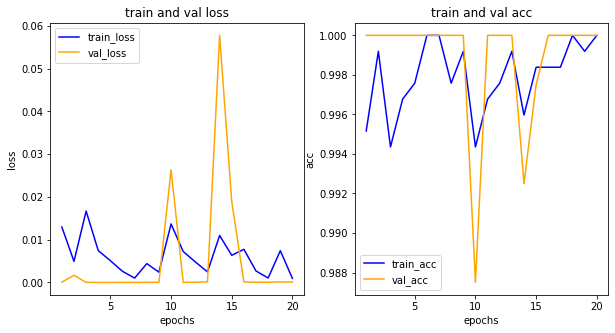

In [97]:
import matplotlib.pyplot as plt

his_dict = history.history
loss = his_dict['loss']
val_loss = his_dict['val_loss']

epochs = range(1, len(loss)+1)
fig = plt.figure(figsize = (10,5))
# 학습 및 검증 손실 그리기

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, color = 'blue', label = 'train_loss')
ax1.plot(epochs, val_loss , color = 'orange', label = 'val_loss')
ax1.set_title('train and val loss')
ax1.set_xlabel('epochs')
ax1.set_ylabel('loss')
ax1.legend()

acc = his_dict['acc']
val_acc = his_dict['val_acc']

# 학습 및 검증 정확도 그리기

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, acc, color = 'blue', label = 'train_acc')
ax2.plot(epochs, val_acc, color = 'orange', label = 'val_acc')
ax2.set_title('train and val acc')
ax2.set_xlabel('epochs')
ax2.set_ylabel('acc')
ax2.legend()

# Q16. 모델 테스트

In [98]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt

def pred224(fname):
  img=image.load_img(fname, target_size=(224,224))
  plt.imshow(img)

  x=image.img_to_array(img)
  images = np.expand_dims(x, axis = 0)

  classes = model.predict(images, batch_size = 10)
  print(classes[0])

  if classes[0]>0:
    print(fname.split('/')[-1] + '마스크 착용')
  else:
    print(fname.split('/')[-1] + '마스크 미착용')



[0.5632448]
withoutmask (743).jpg마스크 착용
[1.]
withoutmask (791).jpg마스크 착용
[0.9652774]
withoutmask (655).jpg마스크 착용
[1.1694279e-12]
withoutmask (669).jpg마스크 착용
[1.0698595e-12]
withoutmask (778).jpg마스크 착용
[1.]
withoutmask (625).jpg마스크 착용
[1.]
withoutmask (716).jpg마스크 착용
[1.]
withoutmask (814).jpg마스크 착용
[0.7557568]
withoutmask (816).jpg마스크 착용
[0.01142319]
withoutmask (652).jpg마스크 착용


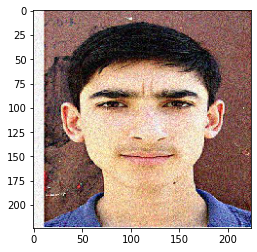

In [100]:
# 마스크 미착용자 테스트
import random

for i in range(10):
  x = random.randint(621,621+len(val_maskY_fnames))
  pred224('/content/validation/withoutmask/withoutmask ('+str(x)+').jpg')

In [ ]:
# 마스크 착용자 테스트
import random

for i in range(10):
  x = random.randint(621,621+len(val_maskY_fnames))
  pred224('/content/validation/withmask/withmask ('+str(x)+').jpg')